<a href="https://colab.research.google.com/github/ANIKNCI/Jfk-flight-data-set-/blob/main/Final_Thesis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Research Project

# Predicting Flight Delays: How Weather and Seasons  Affect Air Travel?

## Importing Libraris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


## Some Important Function used throughout the Notebook

In [2]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drops specified columns from a pandas DataFrame inplace.
    Returns:
    None
    """
    dataframe.drop(columns=columns_to_drop, inplace=True)

In [3]:
def missing_values(Dataframe):
    '''To Check the missing Values in Data  Frame'''
    Feature=[]
    missing_values=[]
    Percentage_of_Missing_Values=[]
    Matrix=pd.DataFrame()
    for i in Dataframe.columns:
        a=Dataframe[i].isnull().sum()
        if a > 0:
            b=a/len(Dataframe)*100
            missing_values.append(a)
            Feature.append(i)
            Percentage_of_Missing_Values.append(b)
    Matrix["Feature"]=Feature
    Matrix["Missing Values"]=missing_values
    Matrix["Percentage of Missing Values"]=Percentage_of_Missing_Values
    Matrix=Matrix.sort_values(by="Percentage of Missing Values", ascending=False)
    return Matrix

In [4]:
def cat_feature(dataframe):
    '''To Check The Category column in Data frame'''
    cat=[]
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            cat.append(col)
    return cat

In [5]:
def unique_feature_values(Dataframe, columns):
    unique_values = []
    for feature in columns:
        unique_values.append((feature,Dataframe[feature].unique()))
    return unique_values

In [6]:
def numerical_feature(dataframe):
    num=[]
    for col in dataframe.columns:
        if dataframe[col].dtype in ['float64', 'int64']:
            num.append(col)
    return num

# Table of Contents

1. [**Data Collection**](#data-collection)
   - [1.1. Flight Data from JFK Airport](#1.1-flight-data-from-jfk-airport)
   - [1.2. Weather Data Set at JFK Airport](#1.2-weather-data-set-at-jfk-airport)
   - [1.3. United States Holiday Data Set](#1.3-united-states-holiday-data-set)

2. [**Data Pre-processing**](#data-pre-processing)
   - [2.1. Integrating Flight, Holiday, and Weather Data](#2.1-integrating-flight-holiday-and-weather-data)
   - [2.2. Refining the Data](#2.2-refining-the-data)
   - [2.3. Feature Extraction](#2.3-feature-extraction)

3. [**Exploratory Data Analysis (EDA)**](#exploratory-data-analysis-eda)


<a name="data-collection"></a>
###  1. Data Collection



####   1.1  JFK airport Fligt data

In [7]:

df1=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(2).csv")
df2=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(3).csv")
df3=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(4).csv")
df4=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(5).csv")
df5=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(6).csv")
df6=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(7).csv")
df7=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(8).csv")
df8=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(9).csv")
df9=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(10).csv")
df10=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(11).csv")
df11=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/JFK/Detailed_Statistics_Departures%20(12).csv")

In [8]:
df11.head(2)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,VX,01-01-2017,23.0,N836VA,SFO,10:30,10:23,389.0,405.0,-7.0,10:43,20.0,0.0,0.0,0.0,0.0,0.0
1,VX,01-01-2017,25.0,N361VA,SFO,11:55,11:46,375.0,419.0,-9.0,12:04,18.0,0.0,35.0,0.0,0.0,0.0


In [9]:
jfk_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11], ignore_index=True).drop_duplicates()
jfk_df.head(2)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,01-01-2017,1.0,N787AA,LAX,08:00,08:31,402.0,398.0,31.0,08:56,25.0,27.0,0.0,0.0,0.0,0.0
1,AA,01-01-2017,9.0,N794AA,SFO,07:00,06:56,405.0,387.0,-4.0,07:18,22.0,0.0,0.0,0.0,0.0,0.0


In [10]:
jfk_df.dropna(inplace=True)

In [11]:
jfk_df.rename(columns={'Date (MM/DD/YYYY)':'Date'},inplace=True)

In [12]:
date_formats = ['%m/%d/%Y', '%d-%m-%Y', '%Y/%m/%d']
# Function to try parsing a date with multiple formats.
def parse_date(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT  # Return NaT if all formats fail

# Apply the function to your date column
jfk_df['Date'] = jfk_df['Date'].apply(parse_date)

In [13]:
jfk_df['Date'] = jfk_df['Date'].dt.strftime('%Y-%m-%d')
jfk_df['Scheduled departure time'] = jfk_df['Scheduled departure time'].astype(str)
jfk_df['Datetime'] = pd.to_datetime(jfk_df['Date'] + ' ' + jfk_df['Scheduled departure time'])

In [14]:
jfk_df['Departure Year'] = jfk_df['Datetime'].dt.year
jfk_df['Departure Month'] = jfk_df['Datetime'].dt.month
jfk_df['Departure Day'] = jfk_df['Datetime'].dt.day
jfk_df['Departure Hour'] = jfk_df['Datetime'].dt.hour
jfk_df['Departure Minute'] = jfk_df['Datetime'].dt.minute
jfk_df['Day of the Week'] = jfk_df['Datetime'].dt.day_name()
jfk_df['Weekday'] = jfk_df['Datetime'].dt.day_name().apply(lambda x: 'No' if x in ['Saturday', 'Sunday'] else 'Yes')


In [15]:
jfk_df[['Datetime','Departure Hour','Departure Minute','Departure Day','Departure Month','Departure Year','Day of the Week','Weekday']].head(6)

,Datetime,Departure Hour,Departure Minute,Departure Day,Departure Month,Departure Year,Day of the Week,Weekday
0,2017-01-01 08:00:00,8,0,1,1,2017,Sunday,No
1,2017-01-01 07:00:00,7,0,1,1,2017,Sunday,No
2,2017-01-01 08:25:00,8,25,1,1,2017,Sunday,No
3,2017-01-01 09:00:00,9,0,1,1,2017,Sunday,No
4,2017-01-01 19:00:00,19,0,1,1,2017,Sunday,No
5,2017-01-01 22:15:00,22,15,1,1,2017,Sunday,No


In [16]:
jfk_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Datetime', 'Departure Year', 'Departure Month', 'Departure Day',
       'Departure Hour', 'Departure Minute', 'Day of the Week', 'Weekday'],
      dtype='object')

In [17]:
jfk_df.shape

(471224, 25)

In [18]:
jfk_df.head(2)

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),...,Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Datetime,Departure Year,Departure Month,Departure Day,Departure Hour,Departure Minute,Day of the Week,Weekday
0,AA,2017-01-01,1.0,N787AA,LAX,08:00,08:31,402.0,398.0,31.0,...,0.0,0.0,2017-01-01 08:00:00,2017,1,1,8,0,Sunday,No
1,AA,2017-01-01,9.0,N794AA,SFO,07:00,06:56,405.0,387.0,-4.0,...,0.0,0.0,2017-01-01 07:00:00,2017,1,1,7,0,Sunday,No


### 1.2  Weather data set at JFK Airport

In [19]:
weather_df=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/open-meteo-40.67N73.81W2m.csv")

In [20]:
weather_df.head(2)

,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,2017-01-01T00:00,5.9,-0.9,0.0,2,62,29.4,44.3,203,204,52.2
1,2017-01-01T01:00,5.4,-0.2,0.0,3,89,21.9,33.9,213,215,45.4


In [21]:
weather_df['time']=pd.to_datetime(weather_df['time'])
weather_df['time']= pd.to_datetime(weather_df['time'], errors='coerce')
weather_df['Date'] = weather_df['time'].dt.strftime('%Y-%m-%d')
weather_df['Hour']=weather_df['time'].dt.hour

In [22]:
drop_columns(weather_df,'time')

In [23]:
weather_df.rename(columns={'Hour':'Departure Hour'},inplace=True)

In [24]:
weather_df.columns

Index(['temperature_2m (°C)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'weather_code (wmo code)', 'cloud_cover (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'Date', 'Departure Hour'],
      dtype='object')

In [25]:
weather_df.shape

(52584, 12)

#### 1.3  United state Holiday data set

In [26]:
Holiday_df=pd.read_csv("https://raw.githubusercontent.com/ANIKNCI/Jfk-flight-data-set-/main/400_Years_of_Generated_Dates_and_Holidays.csv")

In [27]:
Holiday_df.head(2)

,IS_WORKDAY,IS_HOLIDAY,IS_HOLIDAY_LEAVE,A_DATE,DAY_FULL,DAY_FULL_CAPITAL_CASE,DAY_FULL_LOWER_CASE,DAY_ABBREV,IS_WEEKDAY,IS_WEEKDAY_BY_REGEX,...,YEAR_SHORT,YEAR_FULL,FISCAL_QUARTER,FISCAL_YEAR,FISCAL_YEAR_FULL,TOMORROW,ONE_WEEK_LATER,ONE_MONTH_LATER,THREE_MONTHS_LATER,ONE_YEAR_LATER
0,1,NaN,NaN,1/1/1794,WEDNESDAY,Wednesday,wednesday,WED,1,1,...,94,1794,2,94,1794,1/8/1794,1/8/1794,2/1/1794,4/1/1794,1/1/1795
1,1,NaN,NaN,1/2/1794,THURSDAY,Thursday,thursday,THU,1,1,...,94,1794,2,94,1794,1/9/1794,1/9/1794,2/2/1794,4/2/1794,1/2/1795


In [28]:
Holiday_df['A_DATE'] = pd.to_datetime(Holiday_df['A_DATE'], errors='coerce')


In [29]:
# Set the start and end date for the range
start_date = '01/01/2017'
end_date = '12/31/2022'

# Convert start and end date to datetime
start_date = pd.to_datetime(start_date, format='%m/%d/%Y')
end_date = pd.to_datetime(end_date, format='%m/%d/%Y')

# Query the DataFrame for the date range
Holiday_df = Holiday_df[(Holiday_df['A_DATE'] >= start_date) & (Holiday_df['A_DATE'] <= end_date)]

In [30]:
Holiday_df=Holiday_df[['IS_HOLIDAY','A_DATE']]

In [31]:
Holiday_df['IS_HOLIDAY']=Holiday_df['IS_HOLIDAY'].apply(lambda x:'Yes' if x== 1 else'No')

In [32]:
Holiday_df.rename(columns={'A_DATE':'Date'},inplace=True)

In [33]:
Holiday_df.head(2)

,IS_HOLIDAY,Date
81449,Yes,2017-01-01
81450,No,2017-01-02


In [34]:
Holiday_df.isnull().sum()

IS_HOLIDAY    0
Date          0
dtype: int64

In [35]:
Holiday_df.shape

(2191, 2)

### 2. Data Preprocessing

 #### 2.1 Integrated Flight, Holliday and Weather Data System

In [36]:
merge_df=pd.merge(jfk_df,weather_df,on=['Date','Departure Hour'],how='inner',suffixes=('_left', '_right'))

In [37]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'])

In [38]:
Final_df=pd.merge(merge_df,Holiday_df,on=['Date'],how='inner',suffixes=('_left', '_right'))

In [39]:
Final_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Datetime', 'Departure Year', 'Departure Month', 'Departure Day',
       'Departure Hour', 'Departure Minute', 'Day of the Week', 'Weekday',
       'temperature_2m (°C)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'weather_code (wmo code)', 'cloud_cover (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'IS_HOLIDAY'],
      dtype='object')

In [40]:
Final_df.reset_index(inplace=True)

In [41]:

drop_columns(Final_df,'index')

In [42]:
Final_df.head(2)

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),...,apparent_temperature (°C),precipitation (mm),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),IS_HOLIDAY
0,AA,2017-01-01,1.0,N787AA,LAX,08:00,08:31,402.0,398.0,31.0,...,0.6,0.0,1,32,21.6,36.2,240,242,36.4,Yes
1,AA,2017-01-01,15.0,N785AA,SFO,08:25,08:24,407.0,388.0,-1.0,...,0.6,0.0,1,32,21.6,36.2,240,242,36.4,Yes


####  2.2 Refining the data

In [43]:
missing_values(Final_df)

,Feature,Missing Values,Percentage of Missing Values


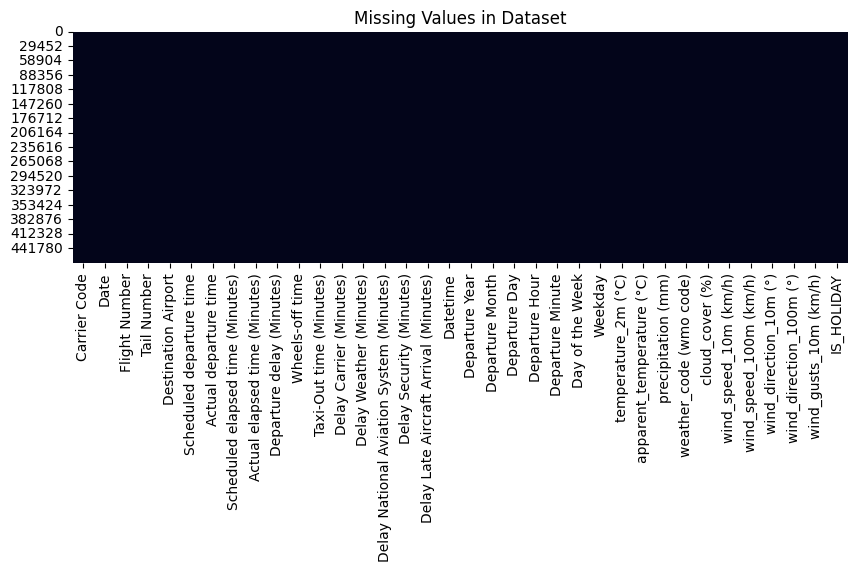

In [44]:
plt.figure(figsize=(10, 3))
sns.heatmap(Final_df.isnull(), cbar=False)
plt.title('Missing Values in Dataset')
plt.show()

##### No missing Values in The data Frame

In [45]:
Final_df.isna().sum()

Carrier Code                                0
Date                                        0
Flight Number                               0
Tail Number                                 0
Destination Airport                         0
Scheduled departure time                    0
Actual departure time                       0
Scheduled elapsed time (Minutes)            0
Actual elapsed time (Minutes)               0
Departure delay (Minutes)                   0
Wheels-off time                             0
Taxi-Out time (Minutes)                     0
Delay Carrier (Minutes)                     0
Delay Weather (Minutes)                     0
Delay National Aviation System (Minutes)    0
Delay Security (Minutes)                    0
Delay Late Aircraft Arrival (Minutes)       0
Datetime                                    0
Departure Year                              0
Departure Month                             0
Departure Day                               0
Departure Hour                    

##### No null Values In Data Frame

In [46]:
Final_df[Final_df['Departure delay (Minutes)'] < 0].shape

(286283, 36)

Delay less than zero is not usefull

In [47]:
Final_df['Departure delay (Minutes)']=Final_df['Departure delay (Minutes)'].apply(lambda x: 0 if x<0 else x )

In [48]:
Final_df[Final_df['Departure delay (Minutes)'] < 0]

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),...,apparent_temperature (°C),precipitation (mm),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),IS_HOLIDAY


No Records with early departure flight

#### 2.3 Feature Extraction

In [49]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

Final_df['Season'] = Final_df['Departure Month'].apply(get_season)

In [50]:
# Ensure the 'Datetime' column is a datetime type
Final_df['Datetime'] = pd.to_datetime(Final_df['Datetime'])
Final_df = Final_df.sort_values('Datetime')
# Apply the rolling function with the 'on' parameter properly
Final_df['Avg Delay Previous Hour'] = Final_df.rolling('60min', on='Datetime')['Departure delay (Minutes)'].mean()

In [51]:
def categorize_delay(delay):
    if delay <= 15:
        return 'No Delay', 0
    elif delay <= 60:
        return 'Moderate', 1
    elif delay <= 120:
        return 'Significant', 2
    elif delay <= 240:
        return 'High', 3
    else:
        return 'Extreme', 4

# Applying the function to each row in 'departure_delay' column
Final_df['delay_category'], Final_df['delay_class'] = zip(*Final_df['Departure delay (Minutes)'].apply(categorize_delay))

In [52]:
# Convert columns to integer type
Final_df['Departure Year'] = Final_df['Departure Year'].astype(int)
Final_df['Departure Month'] = Final_df['Departure Month'].astype(int)
Final_df['Departure Day'] = Final_df['Departure Day'].astype(int)
Final_df['Departure Hour'] = Final_df['Departure Hour'].astype(int)

# Create a 'Datetime_Group' column
Final_df['Datetime_Group'] = pd.to_datetime(Final_df['Departure Year'].astype(str) + '-' +
                                          Final_df['Departure Month'].astype(str) + '-' +
                                          Final_df['Departure Day'].astype(str) + ' ' +
                                          Final_df['Departure Hour'].astype(str) + ':00')

# Group by this new column and count the flights
flights_per_hour = Final_df.groupby('Datetime_Group').size()

# Map the counts back to the original dataframe
Final_df['Flights per Hour'] = Final_df['Datetime_Group'].map(flights_per_hour)

In [53]:
Final_df[['Flights per Hour','delay_category','delay_class','Avg Delay Previous Hour','Season']].head(5)

,Flights per Hour,delay_category,delay_class,Avg Delay Previous Hour,Season
187,7,Moderate,1,42.0,Winter
186,7,No Delay,0,21.0,Winter
184,7,No Delay,0,14.0,Winter
185,7,No Delay,0,10.5,Winter
183,7,No Delay,0,8.4,Winter


Extraction of following columns 'Flights per Hour','delay_category','delay_class','Avg Delay Previous Hour','Season'

In [54]:
Final_df.shape

(471224, 42)

In [55]:
drop_columns(Final_df,['Datetime_Group','Datetime'])

Droping the date Time columns which is not Use full moving ahead

In [56]:
Final_df.shape

(471224, 40)

In [57]:
Final_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Departure Year', 'Departure Month', 'Departure Day', 'Departure Hour',
       'Departure Minute', 'Day of the Week', 'Weekday', 'temperature_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)',
       'weather_code (wmo code)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)', 'IS_HOLIDAY',
       'Season', 'Avg Delay Previous Hour', 'delay_category', 'delay_class',
    

### 3. Exploratory Data Analysis (EDA)

In [58]:
Final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Number,471224.0,2064.072692,1901.329490,1.0,417.000000,1373.0,3809.000000,9393.0
Scheduled elapsed time (Minutes),471224.0,206.973966,117.438109,39.0,106.000000,176.0,337.000000,695.0
Actual elapsed time (Minutes),471224.0,193.295607,120.986396,0.0,94.000000,162.0,319.000000,794.0
Departure delay (Minutes),471224.0,15.731939,48.270389,0.0,0.000000,0.0,7.000000,1757.0
Taxi-Out time (Minutes),471224.0,24.395763,13.998948,0.0,16.000000,21.0,29.000000,179.0
Delay Carrier (Minutes),471224.0,5.969596,29.383970,0.0,0.000000,0.0,0.000000,1507.0
Delay Weather (Minutes),471224.0,0.719265,13.629249,0.0,0.000000,0.0,0.000000,1740.0
Delay National Aviation System (Minutes),471224.0,3.831040,18.936016,0.0,0.000000,0.0,0.000000,1106.0
Delay Security (Minutes),471224.0,0.031571,1.300658,0.0,0.000000,0.0,0.000000,227.0
Delay Late Aircraft Arrival (Minutes),471224.0,4.712496,23.765797,0.0,0.000000,0.0,0.000000,1034.0


#### 3.1 Historam

##### 3.2 Distribution of delay class

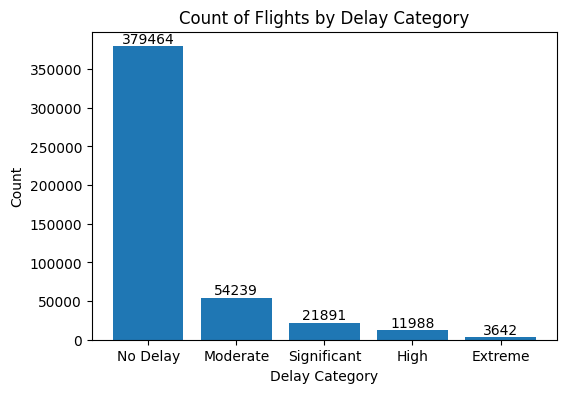

In [59]:
delay_counts = Final_df['delay_category'].value_counts(ascending=False)
plt.figure(figsize=(6, 4))
bars = plt.bar(delay_counts.index, delay_counts.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.title('Count of Flights by Delay Category')
plt.show()

#### 3.3 AIrline Related Visualisation
##### 3.3.1  Flight Distribution by Carrier(Airline )
##### 3.3.2 Number of Delays by Category for Each Airline
##### 3.2.3 Extreme Delays by Airline

 3.3.1  Flight Distribution by Carrier(Airline )

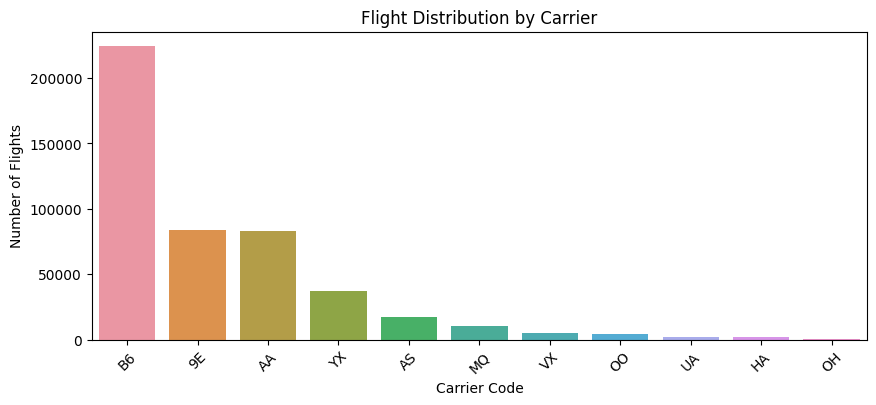

In [60]:
plt.figure(figsize=(10, 4))
carrier_counts = Final_df['Carrier Code'].value_counts()
sns.barplot(x=carrier_counts.index, y=carrier_counts.values)
plt.title('Flight Distribution by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

3.3.2 Number of Delays by Category for Each Airline

In [61]:
carrier_delay_summary = pd.crosstab(Final_df['Carrier Code'], Final_df['delay_category'])
carrier_delay_summary.reset_index(inplace=True)
airline_code_to_name_mapping = {
    'AA': 'American Airlines Inc.',
    'AS': 'Alaska Airlines Inc.',
    'B6': 'JetBlue Airways',
    'HA': 'Hawaiian Airlines Inc.',
    'MQ': 'American Eagle Airlines Inc.',
    'OH': 'PSA Airlines Inc.',
    'OO': 'SkyWest Airlines Inc.',
    'UA': 'United Airlines Inc.',
    'VX': 'Virgin America',
    'YX': 'Republic Airline',
    '9E': 'Endeavor Air Inc.'
}
carrier_delay_summary['Carrier Code'] = carrier_delay_summary['Carrier Code'].replace(airline_code_to_name_mapping)
carrier_delay_summary

delay_category,Carrier Code,Extreme,High,Moderate,No Delay,Significant
0,Endeavor Air Inc.,559,1579,6979,72190,2850
1,American Airlines Inc.,493,1374,7749,70596,3018
2,Alaska Airlines Inc.,94,241,1560,14992,463
3,JetBlue Airways,2086,7423,32192,169228,13210
4,Hawaiian Airlines Inc.,24,27,148,1550,42
5,American Eagle Airlines Inc.,42,219,1250,8762,515
6,PSA Airlines Inc.,4,16,53,503,31
7,SkyWest Airlines Inc.,74,196,529,3330,223
8,United Airlines Inc.,24,39,191,1761,80
9,Virgin America,40,155,543,4417,232


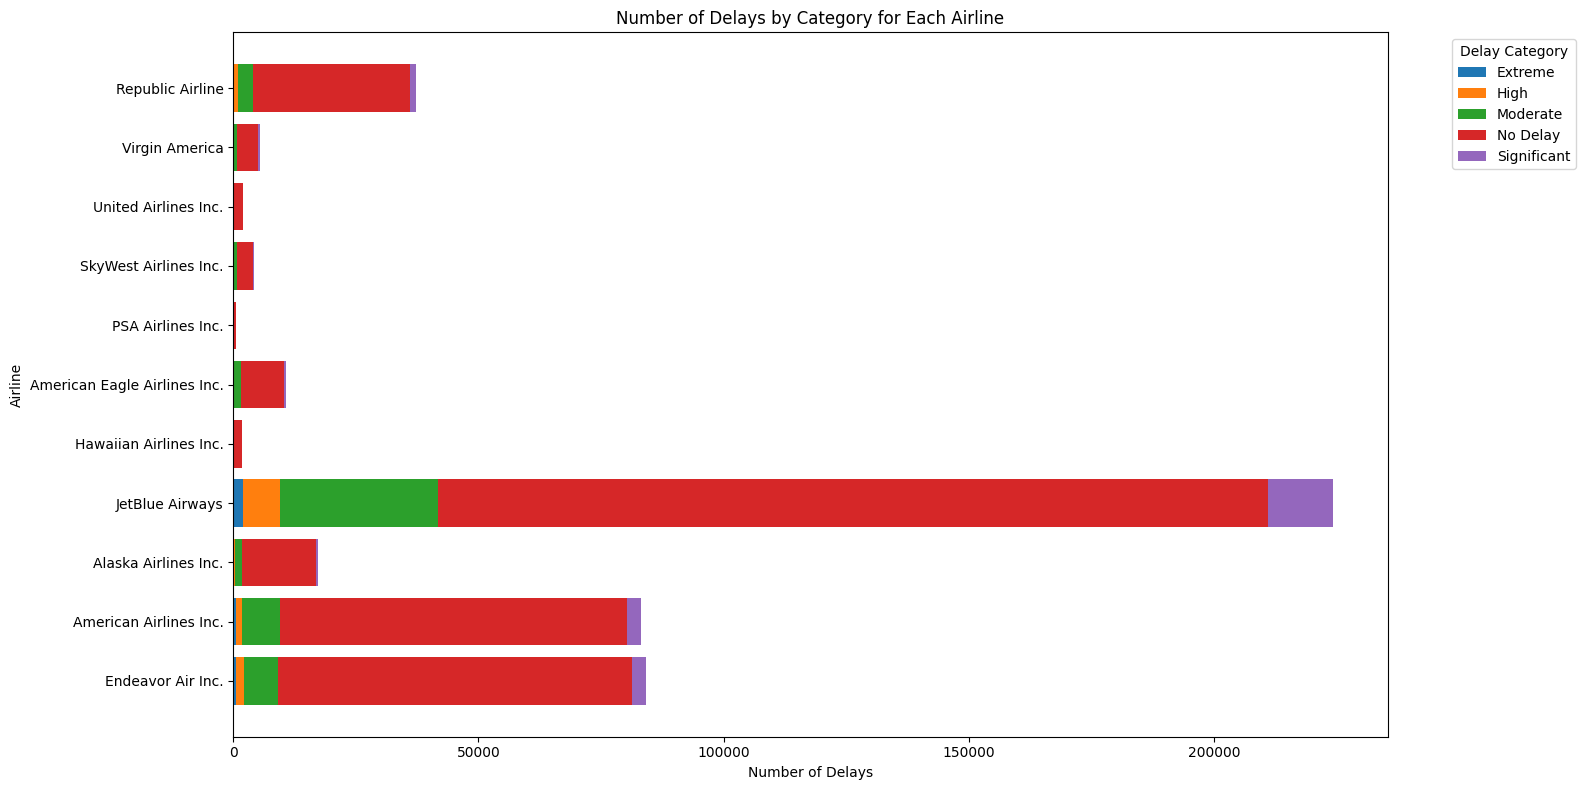

In [62]:
numeric_columns = carrier_delay_summary.columns.drop('Carrier Code')
carrier_delay_summary[numeric_columns] = carrier_delay_summary[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Setting 'Carrier Code' as the index for plotting
carrier_delay_summary.set_index('Carrier Code', inplace=True)

# Plotting the stacked bar plot
plt.figure(figsize=(16, 8))
bottom = pd.Series([0]*len(carrier_delay_summary), index=carrier_delay_summary.index)

for column in numeric_columns:  # Iterate through numeric columns only
    plt.barh(carrier_delay_summary.index, carrier_delay_summary[column], left=bottom, label=column)
    bottom += carrier_delay_summary[column]

plt.xlabel('Number of Delays')
plt.ylabel('Airline')
plt.title('Number of Delays by Category for Each Airline')
plt.legend(title='Delay Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

3.2.3 Extreme Delays by Airline

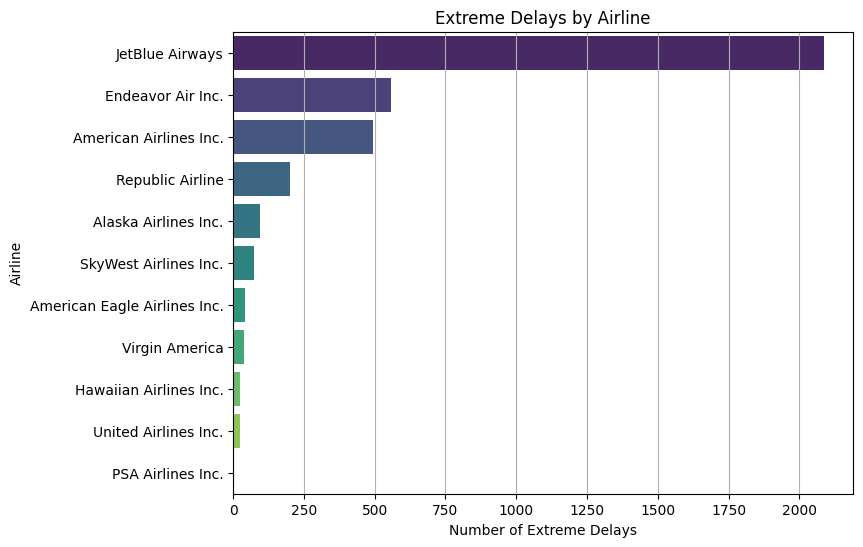

In [63]:
carrier_delay_summary.reset_index(inplace=True)
# Plotting the data for extreme delays
plt.figure(figsize=(8, 6))
sns.barplot(x='Extreme', y='Carrier Code', data=carrier_delay_summary.sort_values('Extreme', ascending=False), palette='viridis')
plt.title('Extreme Delays by Airline')
plt.xlabel('Number of Extreme Delays')
plt.ylabel('Airline')
plt.grid(axis='x')
plt.show()

#### 3.3 Average Departure delay yearly
##### 3.3.1 Average Departure delay (Minutes)r by Year
##### 3.3.2 Average Delay in the Previous Hour by Year

3.3.1 Average Departure delay (Minutes)r by Year

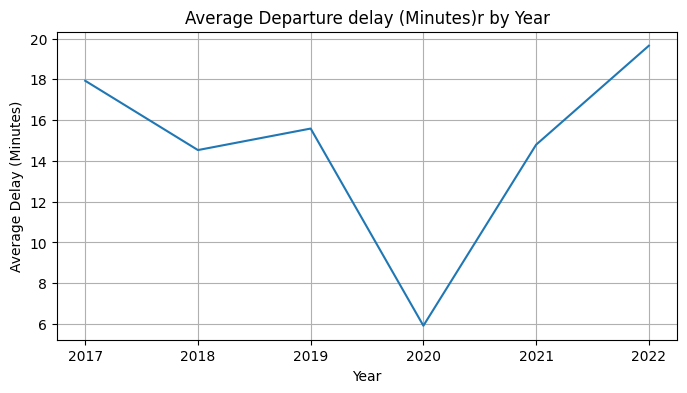

In [64]:
yearly_avg_delay = Final_df.groupby('Departure Year')['Departure delay (Minutes)'].mean()

# Plotting the average delay per year
plt.figure(figsize=(8, 4))
sns.lineplot(x=yearly_avg_delay.index, y=yearly_avg_delay.values)
plt.title('Average Departure delay (Minutes)r by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (Minutes)')
plt.grid(True)
plt.show()

3.3.2 Average Delay in the Previous Hour by Year

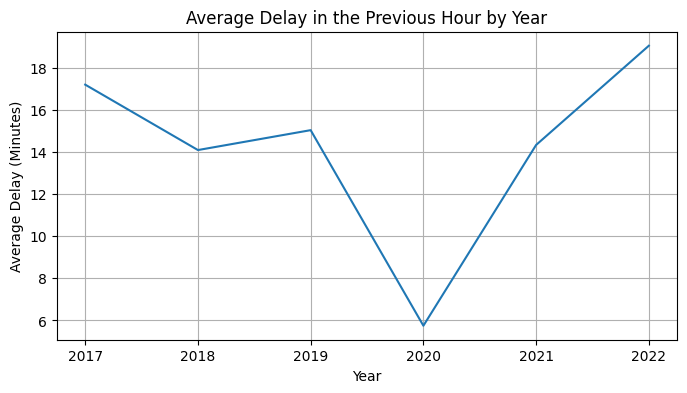

In [65]:
yearly_avg_delay = Final_df.groupby('Departure Year')['Avg Delay Previous Hour'].mean()

# Plotting the average delay per year
plt.figure(figsize=(8, 4))
sns.lineplot(x=yearly_avg_delay.index, y=yearly_avg_delay.values)
plt.title('Average Delay in the Previous Hour by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (Minutes)')
plt.grid(True)
plt.show()

#### 3.4 Analyzing  how weather  Effects on deputure delays
##### 3.4.1  Avg Weather and Avg Departure delay By mounth

3.4.1  Avg Weather and Avg Departure delay By mounth

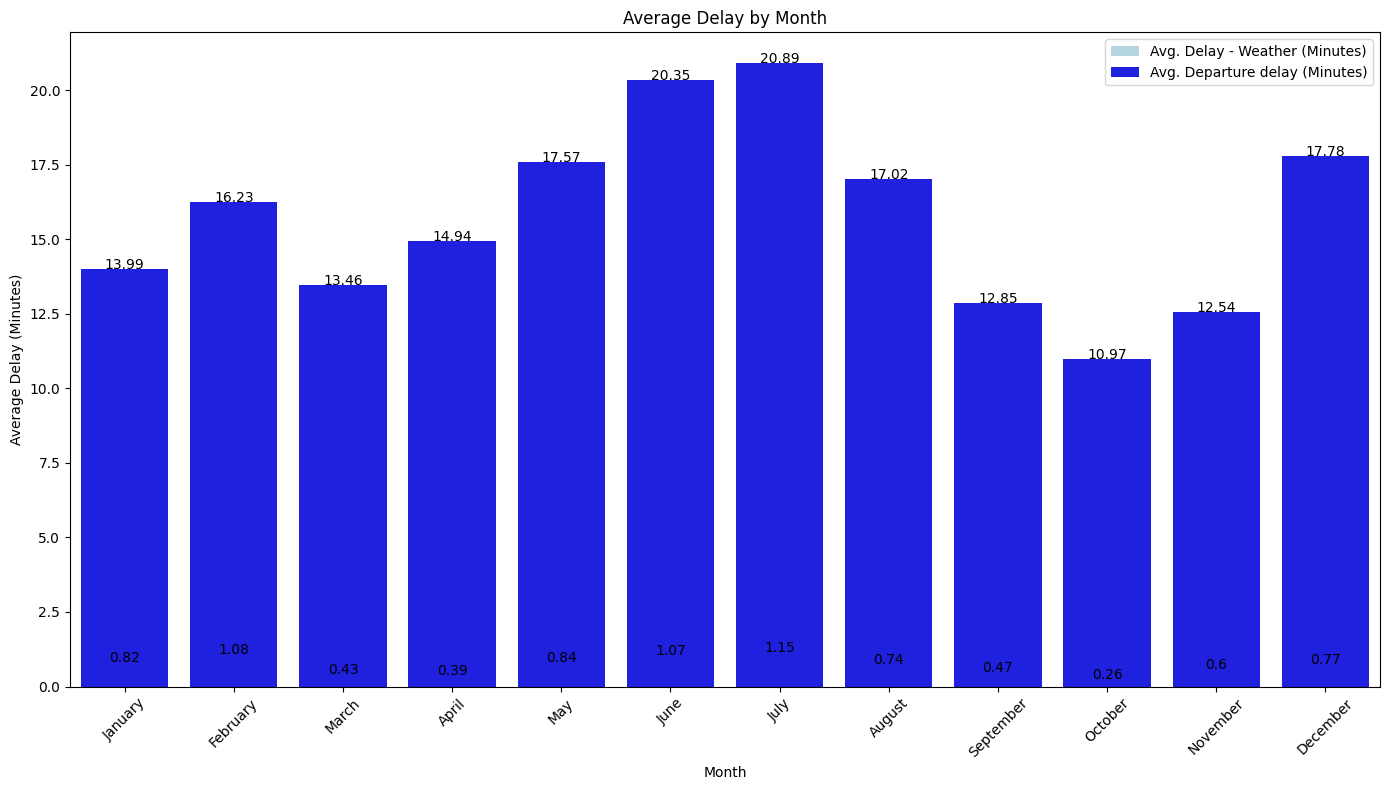

In [66]:
# Group by 'Month' and calculate average delays
monthly_avg_delay_weather = Final_df.groupby('Departure Month')['Delay Weather (Minutes)'].mean()
monthly_avg_departure_delay = Final_df.groupby('Departure Month')['Departure delay (Minutes)'].mean()

# Create a DataFrame for the plot
monthly_delays = pd.DataFrame({
    'Month': monthly_avg_delay_weather.index,
    'Avg. Delay - Weather (Minutes)': monthly_avg_delay_weather.values,
    'Avg. Departure delay (Minutes)': monthly_avg_departure_delay.values
})
monthly_delays.sort_values('Month', inplace=True)

# Plotting
plt.figure(figsize=(14, 8))

# Bar plot for weather delays
sns.barplot(x='Month', y='Avg. Delay - Weather (Minutes)', data=monthly_delays, color='lightblue', label='Avg. Delay - Weather (Minutes)')

# Bar plot for departure delays
sns.barplot(x='Month', y='Avg. Departure delay (Minutes)', data=monthly_delays, color='blue', label='Avg. Departure delay (Minutes)')

# Add labels on top of the bars
for index, row in monthly_delays.iterrows():
    plt.text(row.name, row['Avg. Delay - Weather (Minutes)'], round(row['Avg. Delay - Weather (Minutes)'],2), color='black', ha="center")
    plt.text(row.name, row['Avg. Departure delay (Minutes)'], round(row['Avg. Departure delay (Minutes)'],2), color='black', ha="center")

# Labels and title
plt.xlabel('Month')
plt.ylabel('Average Delay (Minutes)')
plt.title('Average Delay by Month')
plt.xticks(range(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

3.4.2  Avg Weather and Avg Departure delay By Season

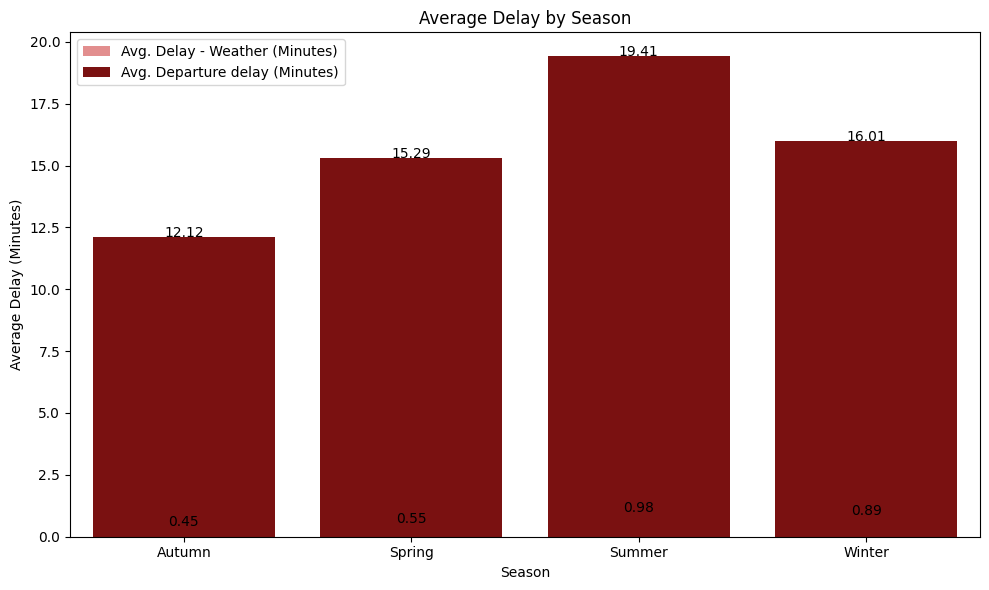

In [67]:
seasonal_avg_delay_weather = Final_df.groupby('Season')['Delay Weather (Minutes)'].mean()
seasonal_avg_departure_delay = Final_df.groupby('Season')['Departure delay (Minutes)'].mean()
# Create a DataFrame for the plot
seasonal_delays = pd.DataFrame({
    'Season': seasonal_avg_delay_weather.index,
    'Avg. Delay - Weather (Minutes)': seasonal_avg_delay_weather.values,
    'Avg. Departure delay (Minutes)': seasonal_avg_departure_delay.values
})

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for weather delays
sns.barplot(x='Season', y='Avg. Delay - Weather (Minutes)', data=seasonal_delays, color='lightcoral', label='Avg. Delay - Weather (Minutes)')

# Bar plot for departure delays
sns.barplot(x='Season', y='Avg. Departure delay (Minutes)', data=seasonal_delays, color='darkred', label='Avg. Departure delay (Minutes)')

# Add labels on top of the bars
for index, row in seasonal_delays.iterrows():
    plt.text(index, row['Avg. Delay - Weather (Minutes)'], round(row['Avg. Delay - Weather (Minutes)'],2), color='black', ha="center")
    plt.text(index, row['Avg. Departure delay (Minutes)'], round(row['Avg. Departure delay (Minutes)'],2), color='black', ha="center")

# Labels and title
plt.xlabel('Season')
plt.ylabel('Average Delay (Minutes)')
plt.title('Average Delay by Season')
plt.legend()
plt.tight_layout()
plt.show()

##### 3.5 Hollidays and weekdays effect on depatrue delay
###### 3.5.1 Hollidays effect on depurture delays
###### 3.5.2 Weekdays vs weekend effects in avg departure delays


3.5.1 Hollidays effect on depurture delays

In [68]:
Final_df[Final_df['IS_HOLIDAY'] == 'Yes']['Departure Month'].value_counts()

1     2493
11    2219
10    1406
2     1380
9     1257
5     1236
7     1184
12    1086
6      495
Name: Departure Month, dtype: int64

as it is clear that the there are no holidays on month march aprail and august in data set

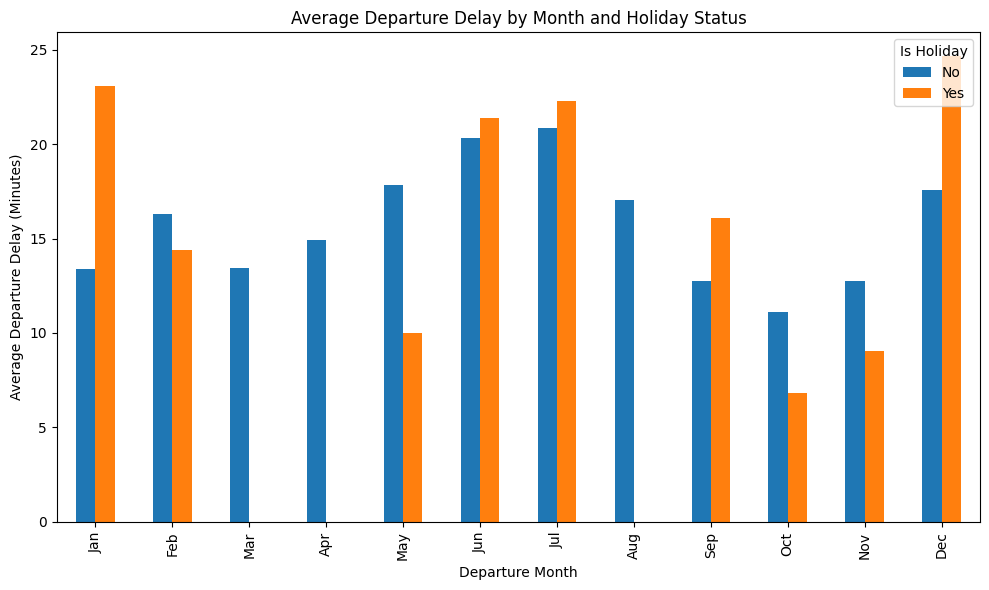

In [69]:
a1=Final_df.groupby(['IS_HOLIDAY', 'Departure Month'])['Departure delay (Minutes)'].mean().to_frame().reset_index()
pivot_a1 = a1.pivot(index='Departure Month', columns='IS_HOLIDAY', values='Departure delay (Minutes)')
pivot_a1 = pivot_a1.fillna(0)

pivot_a1.plot(kind='bar', figsize=(10, 6))
plt.title('Average Departure Delay by Month and Holiday Status')
plt.xlabel('Departure Month')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Is Holiday')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

3.5.2 Weekdays vs weekend effects in avg departure delays

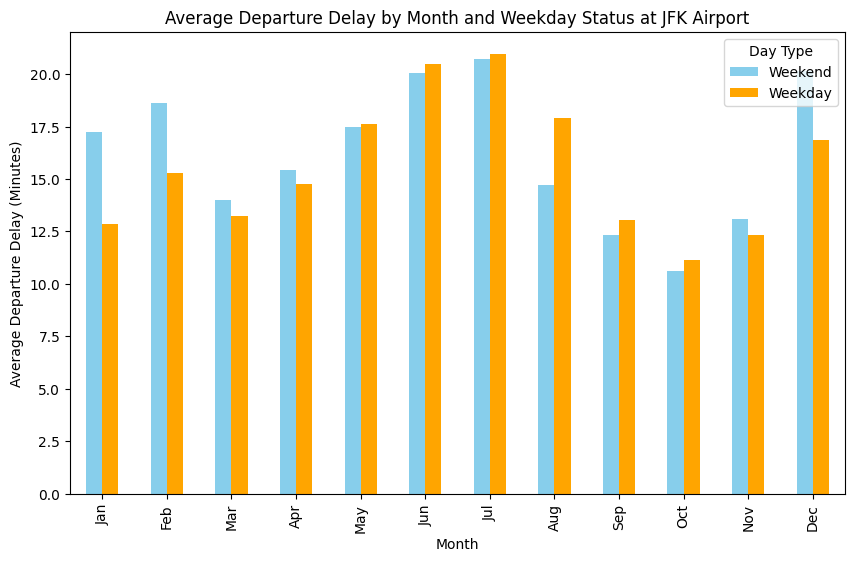

In [70]:
a2=Final_df.groupby(['Weekday', 'Departure Month'])['Departure delay (Minutes)'].mean().to_frame().reset_index()
pivot_a2 = a2.pivot(index='Departure Month', columns='Weekday', values='Departure delay (Minutes)')

# Plotting the graph
pivot_a2.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Average Departure Delay by Month and Weekday Status at JFK Airport')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Day Type', labels=['Weekend', 'Weekday'])
plt.show()

#### 3.6 Departure delays by Airport
##### 3.6.1Top 10 Destination Airports with the Highest Average Departure Delays
##### 3.6.2  Top 10 Airports with most numbers of extreme delays

3.6.1 Top 10 Destination Airports with the Highest Average Departure Delays

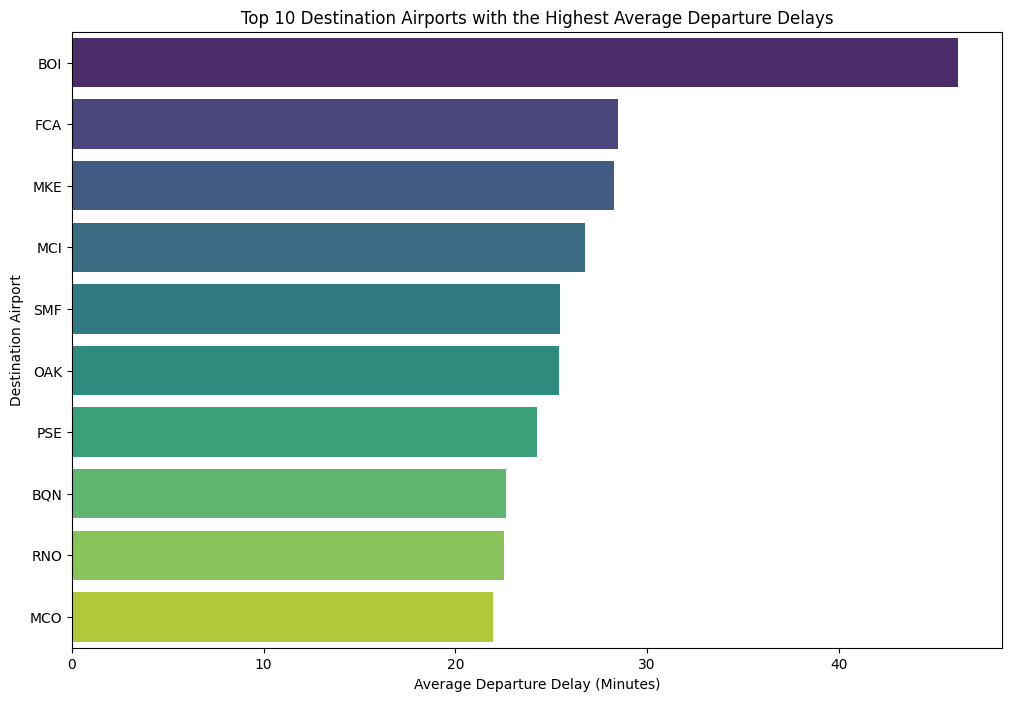

In [71]:
airport_avg_delays = Final_df.groupby('Destination Airport')['Departure delay (Minutes)'].mean().sort_values(ascending=False)

# Get the top 10 airports with the highest average delay
top_10_airports_avg_delays = airport_avg_delays.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_airports_avg_delays.values, y=top_10_airports_avg_delays.index, palette='viridis')
plt.title('Top 10 Destination Airports with the Highest Average Departure Delays')
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Destination Airport')
plt.show()

3.6.2 Delay Categories for Top 10 Airports with Most Delays

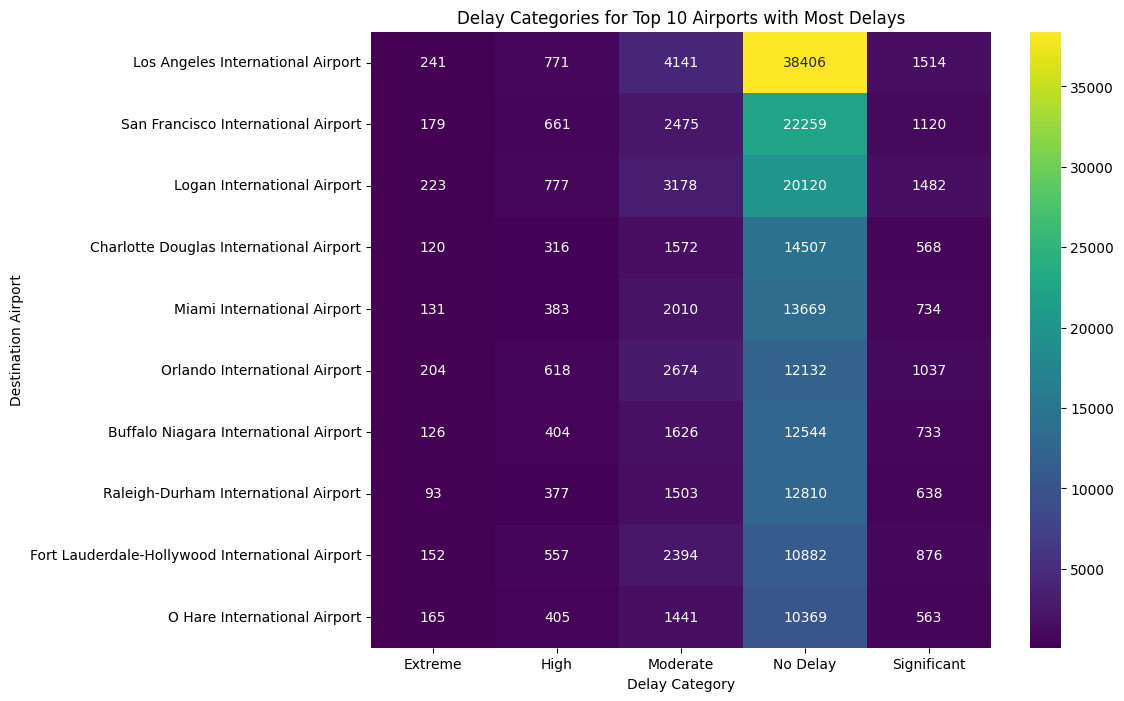

In [72]:
# Create a crosstab to count delays by category for each destination airport
airport_delay_category = pd.crosstab(Final_df['Destination Airport'], Final_df['delay_category'])

# Sum across all delay categories for each airport
airport_delay_totals = airport_delay_category.sum(axis=1).sort_values(ascending=False)

# Get the top 10 airports with the highest total delays
top_10_airports = airport_delay_totals.head(10).index

# Dictionary to map airport codes to full names
airport_names = {
    'LAX': 'Los Angeles International Airport',
    'SFO': 'San Francisco International Airport',
    'BOS': 'Logan International Airport',
    'CLT': 'Charlotte Douglas International Airport',
    'MIA': 'Miami International Airport',
    'MCO': 'Orlando International Airport',
    'BUF': 'Buffalo Niagara International Airport',
    'RDU': 'Raleigh-Durham International Airport',
    'FLL': 'Fort Lauderdale-Hollywood International Airport',
    'ORD': 'O Hare International Airport'
}

# Replace airport codes with full names in the top 10 list
top_10_airports_full_names = [airport_names[airport] for airport in top_10_airports]

# Filter the crosstab to keep only the top 10 airports
top_10_airport_delays = airport_delay_category.loc[top_10_airports]
top_10_airport_delays = top_10_airport_delays.rename(index=airport_names)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_airport_delays, annot=True, fmt="d", cmap='viridis')
plt.title('Delay Categories for Top 10 Airports with Most Delays')
plt.ylabel('Destination Airport')
plt.xlabel('Delay Category')
plt.show()


#### 3.7 Normalized Values of Average Delay, Precipitation, and Wind Gust for Each Day of the Year 2022

<ipython-input-73-22594207ffc3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_averages = Final_df[Final_df['Departure Year'] == 2022].groupby('Date')['Departure delay (Minutes)', 'precipitation (mm)', 'wind_gusts_10m (km/h)'].mean().reset_index()


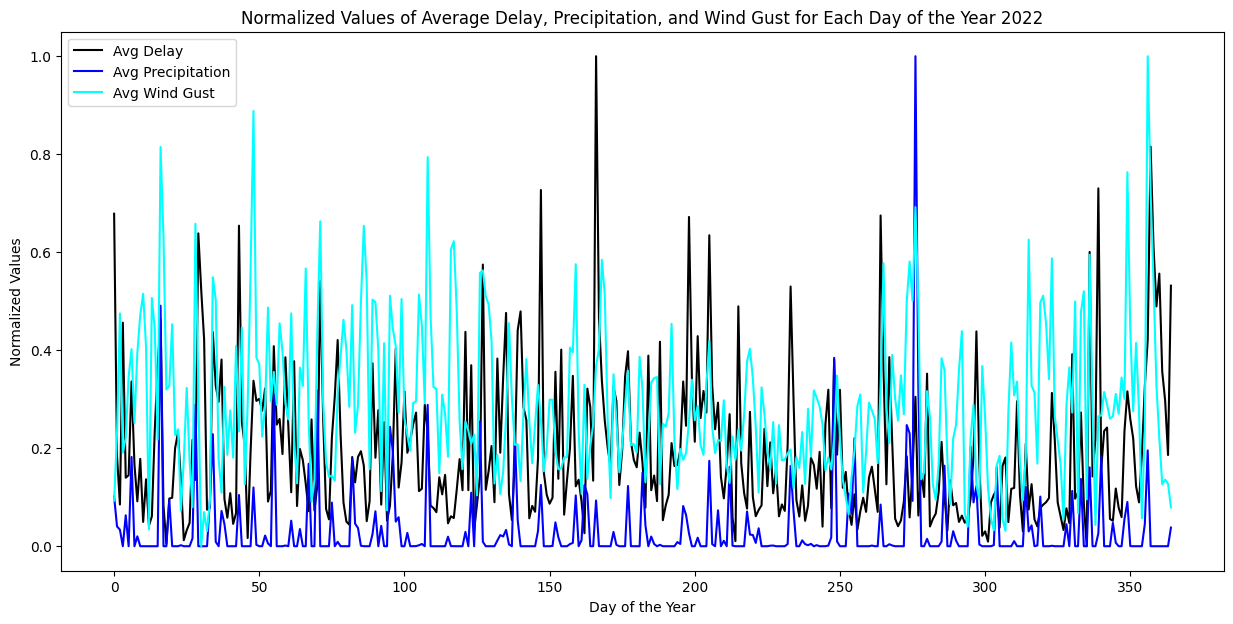

In [73]:
daily_averages = Final_df[Final_df['Departure Year'] == 2022].groupby('Date')['Departure delay (Minutes)', 'precipitation (mm)', 'wind_gusts_10m (km/h)'].mean().reset_index()

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(daily_averages[['Departure delay (Minutes)', 'precipitation (mm)', 'wind_gusts_10m (km/h)']])
normalized_df = pd.DataFrame(normalized_data, columns=['Avg Delay', 'Avg Precipitation', 'Avg Wind Gust'])

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(normalized_df['Avg Delay'], label='Avg Delay', color='black')
plt.plot(normalized_df['Avg Precipitation'], label='Avg Precipitation', color='blue')
plt.plot(normalized_df['Avg Wind Gust'], label='Avg Wind Gust', color='cyan')
plt.title('Normalized Values of Average Delay, Precipitation, and Wind Gust for Each Day of the Year 2022')
plt.xlabel('Day of the Year')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


In [74]:
drop_columns(Final_df,'Date')

#### 4. Correlation

##### 4.1 Corelation test  method cramers

In [75]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # Corrected phi2
    rcorr = r - ((r-1)**2)/(n-1)  # Corrected degrees of freedom for rows
    kcorr = k - ((k-1)**2)/(n-1)  # Corrected degrees of freedom for columns
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming Final_df is your dataframe and it is already loaded in your environment
# Create an empty dataframe to hold Cramer's V coefficients
categorical_columns = Final_df.select_dtypes(include=['object', 'category']).columns
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns,
                                columns=categorical_columns)

# Calculate Cramer's V for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(Final_df[col1], Final_df[col2])

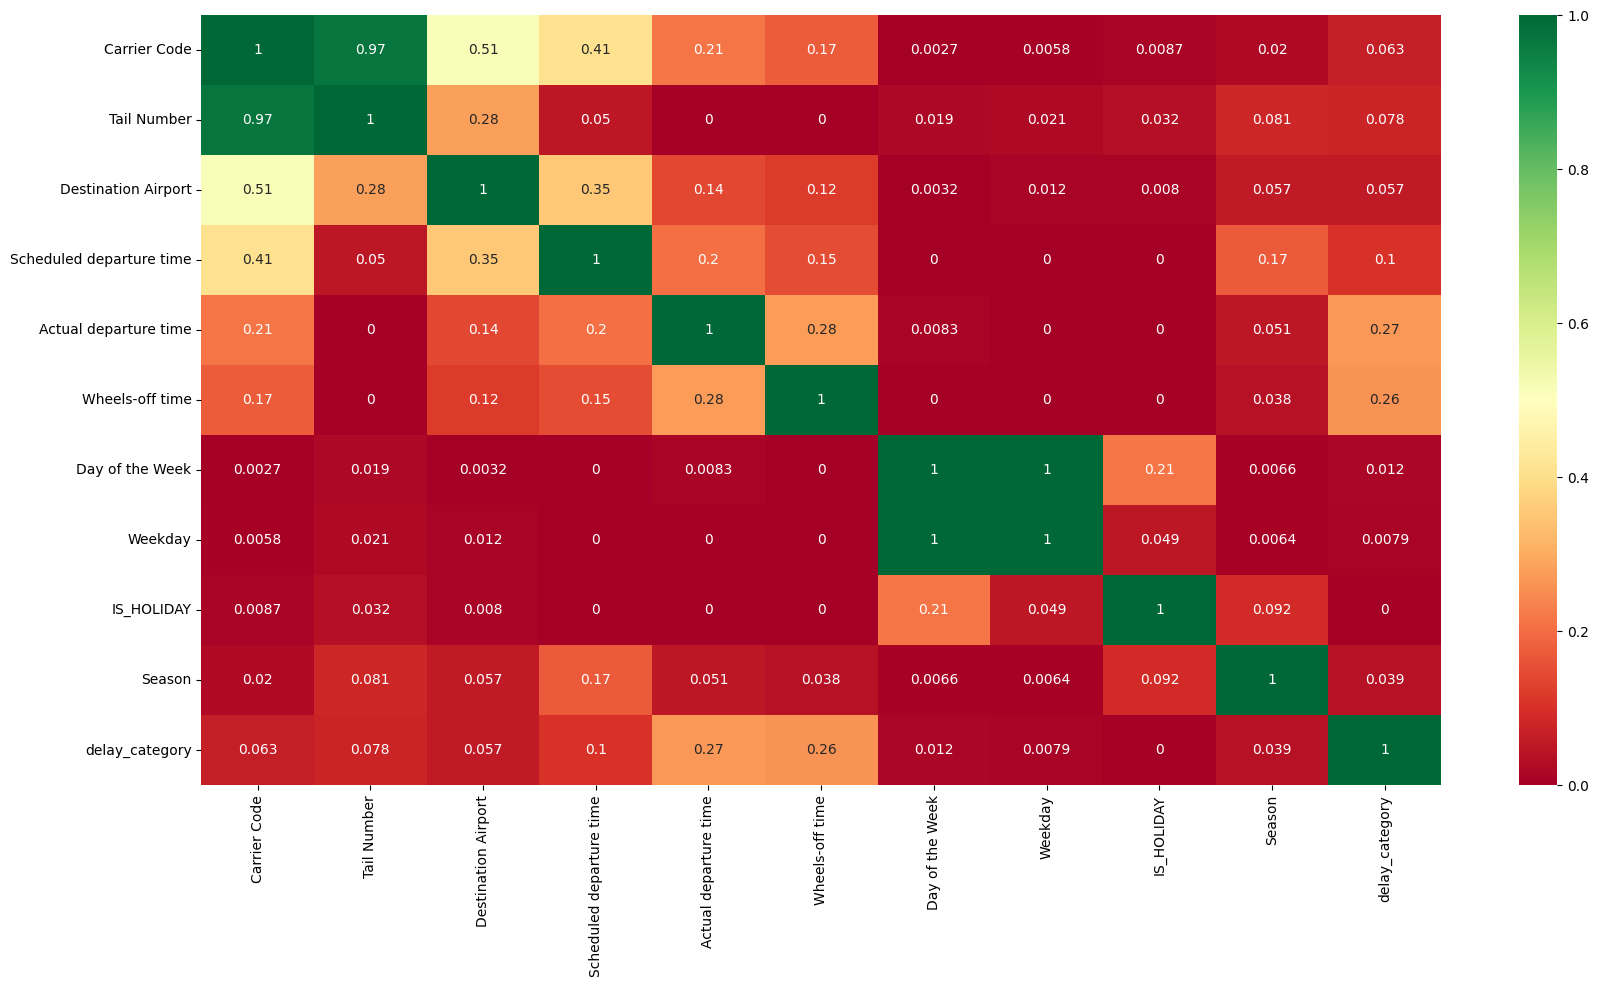

In [76]:
plt.figure(figsize=(20,10))
g=sns.heatmap(cramers_v_matrix,annot=True,cmap="RdYlGn")

Tail no. and Carrier code is highly correlated

##### 4.2   Correlation by pearson method

<ipython-input-77-4fc40a690b51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Final_df.corr(method='pearson')


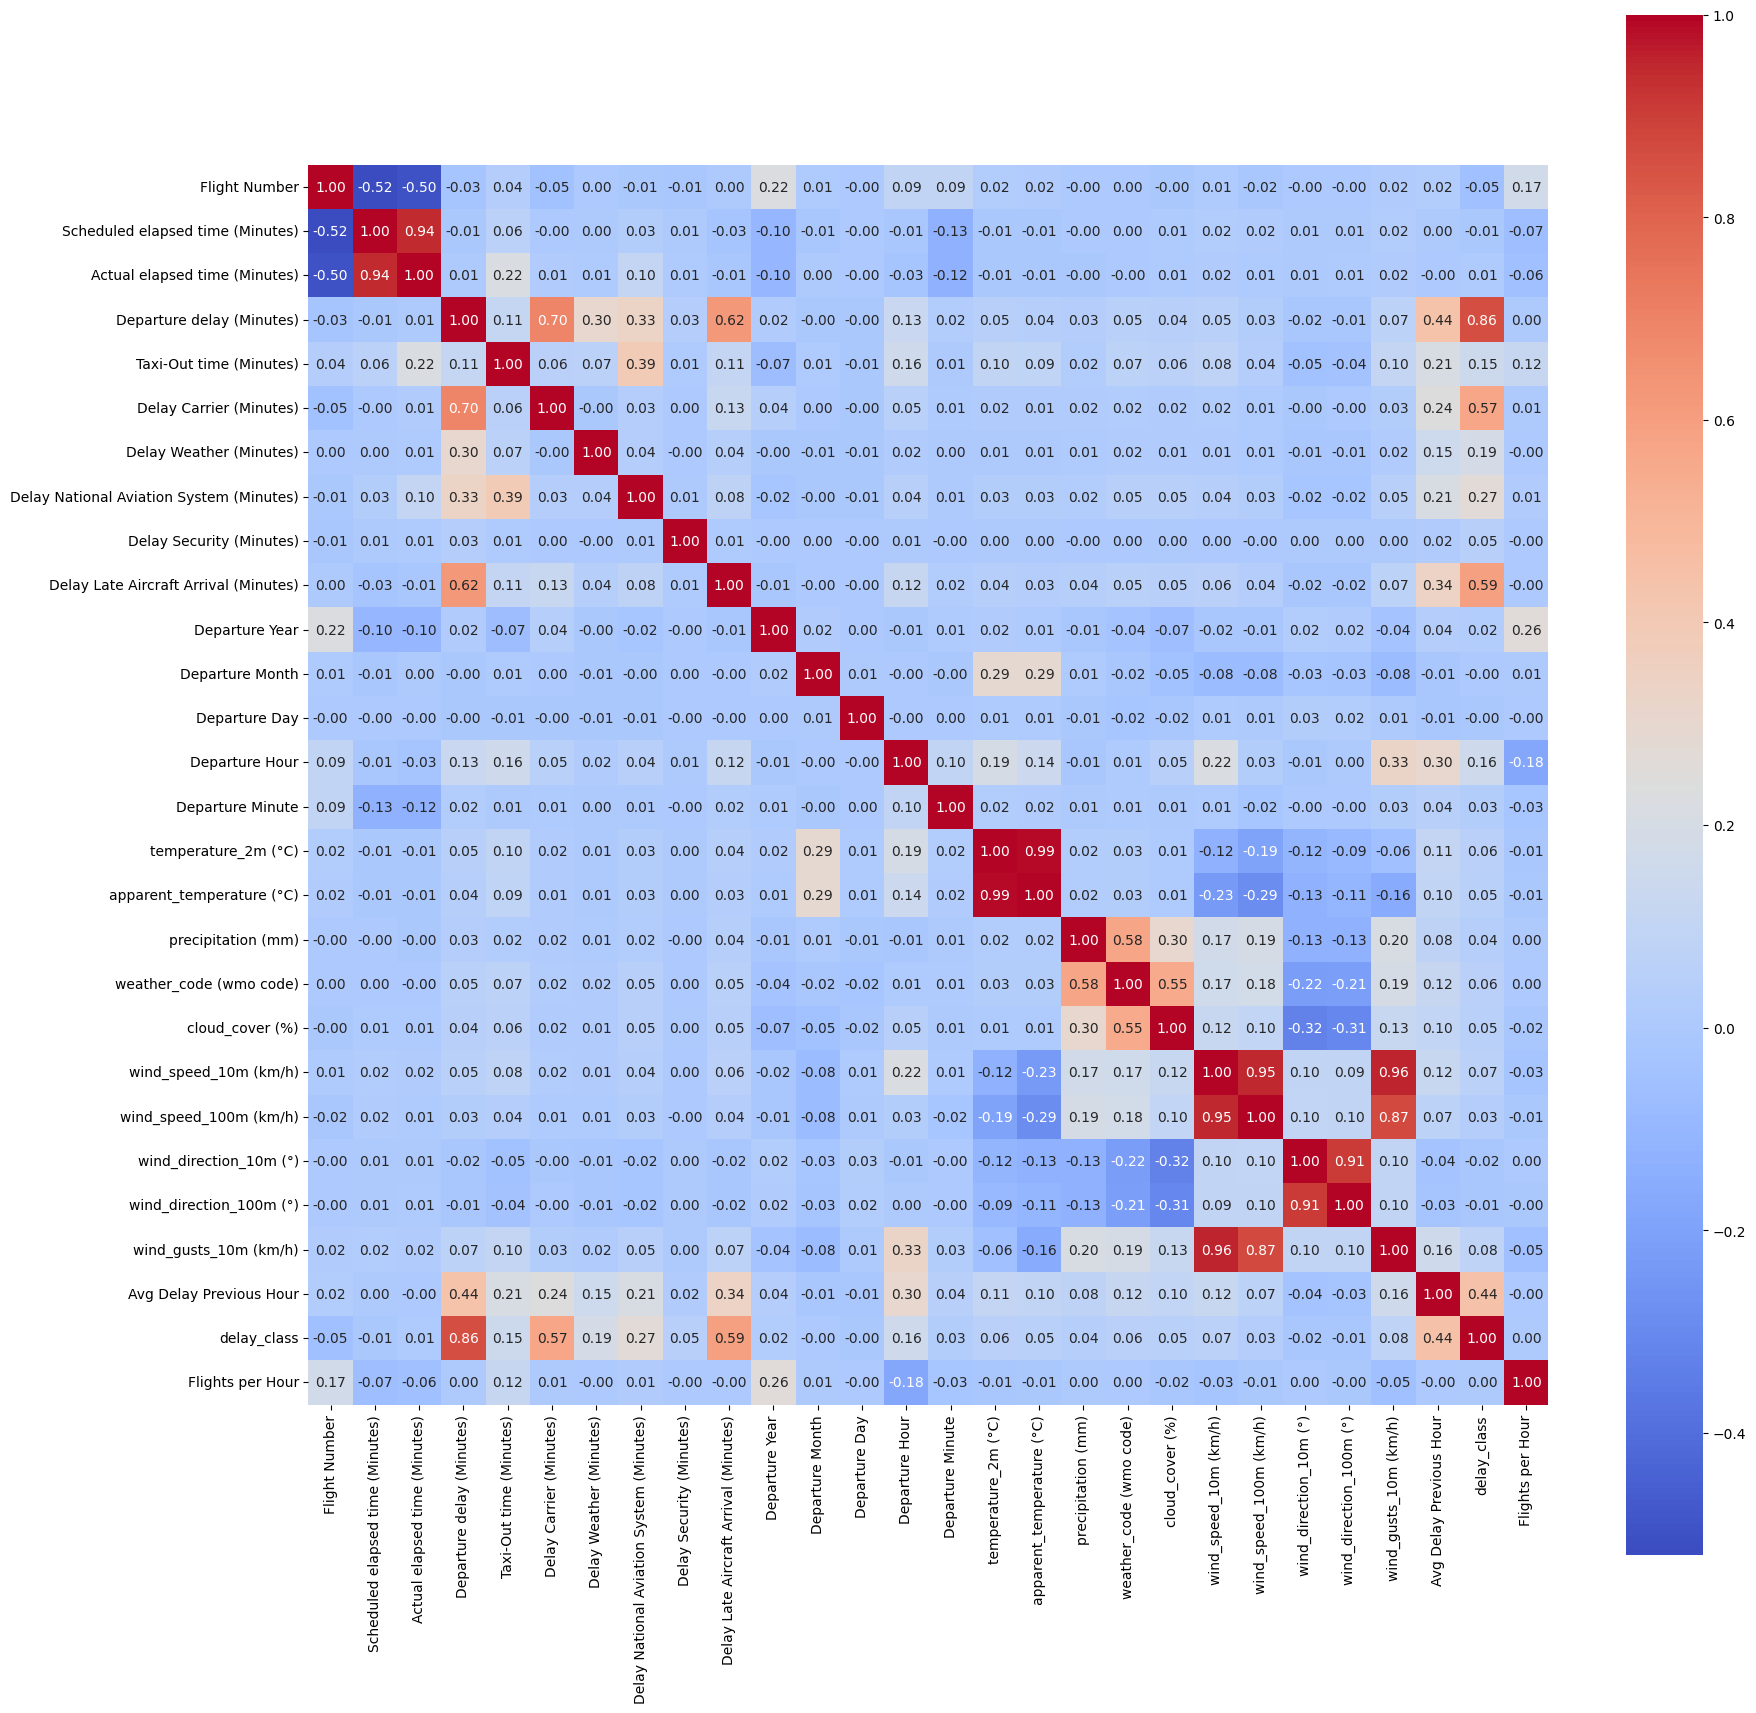

In [77]:
correlation_matrix = Final_df.corr(method='pearson')
plt.figure(figsize=(20, 20))
g = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [78]:
list_Indpndt_features = numerical_feature(Final_df)

In [79]:
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = Final_df[list_Indpndt_features[i]].corr(Final_df[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

Scheduled elapsed time (Minutes)  &  Actual elapsed time (Minutes)  =  0.9438663243548208
Departure delay (Minutes)  &  Delay Carrier (Minutes)  =  0.6964360085343828
Departure delay (Minutes)  &  Delay Late Aircraft Arrival (Minutes)  =  0.6215978549630229
Departure delay (Minutes)  &  delay_class  =  0.8611738965178163
Delay Carrier (Minutes)  &  delay_class  =  0.5721669828935054
Delay Late Aircraft Arrival (Minutes)  &  delay_class  =  0.594040045153288
temperature_2m (°C)  &  apparent_temperature (°C)  =  0.9904102231539719
precipitation (mm)  &  weather_code (wmo code)  =  0.5762218946699531
weather_code (wmo code)  &  cloud_cover (%)  =  0.5510478735042084
wind_speed_10m (km/h)  &  wind_speed_100m (km/h)  =  0.9477849735674102
wind_speed_10m (km/h)  &  wind_gusts_10m (km/h)  =  0.9561170309575215
wind_speed_100m (km/h)  &  wind_gusts_10m (km/h)  =  0.8701777726590154
wind_direction_10m (°)  &  wind_direction_100m (°)  =  0.9052128434679411


Based on the above observation droping few coulmns

In [80]:
drop_columns(Final_df,['Carrier Code','Tail Number','Flight Number'])

In [81]:
drop_columns(Final_df,['wind_speed_10m (km/h)','wind_direction_10m (°)','apparent_temperature (°C)','Actual elapsed time (Minutes)'])

In [82]:
Final_df.shape

(471224, 32)

### 5. Encoading & Feature Selection  

Categorical Features in the data Frame

In [83]:
cat_feature(Final_df)

['Destination Airport',
 'Scheduled departure time',
 'Actual departure time',
 'Wheels-off time',
 'Day of the Week',
 'Weekday',
 'IS_HOLIDAY',
 'Season',
 'delay_category']

Numerical Feature in Data Frame

In [84]:
numerical_feature(Final_df)

['Scheduled elapsed time (Minutes)',
 'Departure delay (Minutes)',
 'Taxi-Out time (Minutes)',
 'Delay Carrier (Minutes)',
 'Delay Weather (Minutes)',
 'Delay National Aviation System (Minutes)',
 'Delay Security (Minutes)',
 'Delay Late Aircraft Arrival (Minutes)',
 'Departure Year',
 'Departure Month',
 'Departure Day',
 'Departure Hour',
 'Departure Minute',
 'temperature_2m (°C)',
 'precipitation (mm)',
 'weather_code (wmo code)',
 'cloud_cover (%)',
 'wind_speed_100m (km/h)',
 'wind_direction_100m (°)',
 'wind_gusts_10m (km/h)',
 'Avg Delay Previous Hour',
 'delay_class',
 'Flights per Hour']

Unique Values in Categorical Feature

In [85]:
unique_feature_values(Final_df,cat_feature(Final_df))

[('Destination Airport',
  array(['MCO', 'SJU', 'FLL', 'BQN', 'RSW', 'MIA', 'PBI', 'LAX', 'TPA',
         'MSY', 'BUF', 'CLT', 'PHX', 'CHS', 'SFO', 'SAV', 'SEA', 'LAS',
         'AUS', 'BOS', 'JAX', 'RDU', 'IAD', 'ORD', 'STT', 'DAB', 'SRQ',
         'SYR', 'BTV', 'SAN', 'HNL', 'PWM', 'LGB', 'ROC', 'HOU', 'DCA',
         'DFW', 'EGE', 'BUR', 'TUS', 'SJC', 'PSP', 'SMF', 'SLC', 'RNO',
         'ABQ', 'OAK', 'DEN', 'PDX', 'PSE', 'ACK', 'HYA', 'MVY', 'PIT',
         'BWI', 'DTW', 'RIC', 'CLE', 'ORF', 'BNA', 'CMH', 'IND', 'PHL',
         'CVG', 'BGR', 'MSP', 'ATL', 'ORH', 'ONT', 'SAT', 'IAH', 'BZN',
         'HDN', 'EYW', 'JAC', 'FCA', 'SNA', 'BOI', 'MKE', 'MCI'],
        dtype=object)),
 ('Scheduled departure time',
  array(['05:05', '05:20', '05:30', ..., '16:11', '21:14', '23:39'],
        dtype=object)),
 ('Actual departure time',
  array(['05:47', '05:19', '05:13', ..., '04:32', '02:50', '04:30'],
        dtype=object)),
 ('Wheels-off time',
  array(['06:00', '05:40', '05:24', ..., '04:

##### Manually Encoading Colum which has less unique Values

In [86]:
day_of_week_mapping = {
    'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
    'Thursday': 4, 'Friday': 5, 'Saturday': 6
}

season_mapping = {
    'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3
}
is_holiday_mapping = {
    'No': 0, 'Yes': 1
}

weekday_yes_no_mapping = {'Yes': 1, 'No': 0}



Final_df['Weekday'] = Final_df['Weekday'].map(weekday_yes_no_mapping)
Final_df['Day of the Week'] = Final_df['Day of the Week'].map(day_of_week_mapping)
Final_df['Season'] = Final_df['Season'].map(season_mapping)
Final_df['IS_HOLIDAY'] = Final_df['IS_HOLIDAY'].map(is_holiday_mapping)

In [87]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471224 entries, 187 to 471220
Data columns (total 32 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Destination Airport                       471224 non-null  object 
 1   Scheduled departure time                  471224 non-null  object 
 2   Actual departure time                     471224 non-null  object 
 3   Scheduled elapsed time (Minutes)          471224 non-null  float64
 4   Departure delay (Minutes)                 471224 non-null  float64
 5   Wheels-off time                           471224 non-null  object 
 6   Taxi-Out time (Minutes)                   471224 non-null  float64
 7   Delay Carrier (Minutes)                   471224 non-null  float64
 8   Delay Weather (Minutes)                   471224 non-null  float64
 9   Delay National Aviation System (Minutes)  471224 non-null  float64
 10  Delay Security (Mi

In [88]:
# droping the delay category as it is encoded in delay class
drop_columns(Final_df,['delay_category','Departure Minute'])

In [89]:
Final_df.shape

(471224, 30)

In [90]:
cat_feature(Final_df)

['Destination Airport',
 'Scheduled departure time',
 'Actual departure time',
 'Wheels-off time']

Only few categorical columns are left

In [91]:
Final_df.columns

Index(['Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Departure delay (Minutes)', 'Wheels-off time',
       'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Departure Year', 'Departure Month', 'Departure Day', 'Departure Hour',
       'Day of the Week', 'Weekday', 'temperature_2m (°C)',
       'precipitation (mm)', 'weather_code (wmo code)', 'cloud_cover (%)',
       'wind_speed_100m (km/h)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'IS_HOLIDAY', 'Season',
       'Avg Delay Previous Hour', 'delay_class', 'Flights per Hour'],
      dtype='object')

#### Feature Selection K best method

In [92]:
"""Creating Feature selection dataframe delay class
and temperature(temperatue can be negating and select k bestmethod does not works with negative values )"""
Feature_selection=Final_df.drop(columns=['delay_class','Departure delay (Minutes)','temperature_2m (°C)'],axis=1)

In [93]:
## As the SelectKBEst methods only works for the neumerical data and non negative values
Feature_selection=Feature_selection.drop(columns=cat_feature(Feature_selection))

In [94]:
Feature_selection.shape

(471224, 23)

In [95]:
Y=Final_df['delay_class']

In [96]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Assuming 'Feature_selection' is your DataFrame with features and 'Y' is the target variable
k = min(20, Feature_selection.shape[1])  # Ensure k is not greater than the number of features
selector = SelectKBest(score_func=chi2, k=k)
X_new_selected = selector.fit_transform(Feature_selection, Y)

# Getting the selected feature names
selected_features_mask = selector.get_support()
selected_features = Feature_selection.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['Scheduled elapsed time (Minutes)', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)', 'Departure Month',
       'Departure Day', 'Departure Hour', 'Weekday', 'precipitation (mm)',
       'weather_code (wmo code)', 'cloud_cover (%)', 'wind_speed_100m (km/h)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)', 'Season',
       'Avg Delay Previous Hour', 'Flights per Hour'],
      dtype='object')


In [97]:
Main_df = pd.concat([Final_df[selected_features], Final_df['Destination Airport'],Final_df['delay_class'],Final_df['Departure Year']], axis=1)


Only selected destinatoion airport from rest of categorical feature

In [98]:
Main_df.columns

Index(['Scheduled elapsed time (Minutes)', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)', 'Departure Month',
       'Departure Day', 'Departure Hour', 'Weekday', 'precipitation (mm)',
       'weather_code (wmo code)', 'cloud_cover (%)', 'wind_speed_100m (km/h)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)', 'Season',
       'Avg Delay Previous Hour', 'Flights per Hour', 'Destination Airport',
       'delay_class', 'Departure Year'],
      dtype='object')

In [99]:
cat_feature(Main_df)

['Destination Airport']

We still have one categorical column

##### one Hot encoder

In [100]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming Main_df is already loaded into the environment, if not, it would have to be loaded from a file or defined.

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Select categorical data only for encoding
categorical_cols = Main_df.select_dtypes(include=['object', 'category']).columns

# Apply OneHotEncoder to the selected columns and convert it to a dataframe
encoded_data = one_hot_encoder.fit_transform(Main_df[categorical_cols]).toarray()

# Here's the updated line with the correct method
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from Main_df
Main_df = Main_df.drop(categorical_cols, axis=1)
Main_df = pd.concat([Main_df, encoded_df], axis=1)

# Veriying the data frame
Main_df.head()


,Scheduled elapsed time (Minutes),Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Departure Month,Departure Day,Departure Hour,...,Destination Airport_SJC,Destination Airport_SJU,Destination Airport_SLC,Destination Airport_SMF,Destination Airport_SNA,Destination Airport_SRQ,Destination Airport_STT,Destination Airport_SYR,Destination Airport_TPA,Destination Airport_TUS
187,166.0,13.0,34.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,220.0,21.0,0.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,185.0,11.0,0.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,221.0,18.0,0.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,192.0,18.0,0.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Modelling

In [101]:
Main_df.head(2)

,Scheduled elapsed time (Minutes),Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Departure Month,Departure Day,Departure Hour,...,Destination Airport_SJC,Destination Airport_SJU,Destination Airport_SLC,Destination Airport_SMF,Destination Airport_SNA,Destination Airport_SRQ,Destination Airport_STT,Destination Airport_SYR,Destination Airport_TPA,Destination Airport_TUS
187,166.0,13.0,34.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,220.0,21.0,0.0,0.0,0.0,0.0,0.0,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6.1 Data Splitting

In [102]:
train_df = Main_df[(Main_df['Departure Year'] == 2017) |
             (Main_df['Departure Year'] == 2018) |
             (Main_df['Departure Year'] == 2019) ]
Validation_df=Main_df[Main_df['Departure Year'] == 2020]
test_df=Main_df[(Main_df['Departure Year'] == 2021) |(Main_df['Departure Year'] == 2022) ]

The given Python code is segmenting a dataset (`Main_df`) into three separate dataframes based on the 'Departure Year' column.

- `train_df`: This dataframe is created by filtering `Main_df` for rows where the 'Departure Year' is either 2017, 2018, 2019.

- `Validation_df`: This is a subset of `Main_df` where the 'Departure Year' is exactly 2020. This dataframe is presumably intended for validating the model trained with `train_df`. Validation sets are typically used to fine-tune model parameters and prevent overfitting.

- `test_df`: This dataframe consists of rows from `Main_df` with a 'Departure Year' of 2021 and 2022. This set is likely reserved for testing the final performance of the model after it has been trained and validated. Test sets are used to evaluate the model's generalization to new, unseen data.

The purpose of splitting data this way is to ensure that the model can be trained, validated, and tested on different subsets of data to check its performance and robustness across different time frames, assuming 'Departure Year' is a critical feature in the dataset.


In [103]:
train_df_x=train_df.drop(columns=['delay_class','Departure Year'],axis=1)
train_df_y=train_df['delay_class']

print("Shape of train_df_x:", train_df_x.shape)
print("Shape of train_df_y:", train_df_y.shape)

Shape of train_df_x: (259098, 100)
Shape of train_df_y: (259098,)


In [104]:
Validation_df_x=Validation_df.drop(columns=['delay_class','Departure Year'],axis=1)
Validation_df_y=Validation_df['delay_class']

print("Shape of Validation_df_x:", Validation_df_x.shape)
print("Shape of Validation_df_y:", Validation_df_y.shape)

Shape of Validation_df_x: (39056, 100)
Shape of Validation_df_y: (39056,)


In [105]:
test_df_x=test_df.drop(columns=['delay_class','Departure Year'],axis=1)
test_df_y=test_df['delay_class']

print("Shape of test_df_x:", test_df_x.shape)
print("Shape of test_df_y:", test_df_y.shape)

Shape of test_df_x: (173070, 100)
Shape of test_df_y: (173070,)


The 'Departure Year' feature was used exclusively for segmenting the dataset into training, validation, and testing sets. So drooped it along with 'delay class'

#### 6.2 Sampling

In [106]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(train_df_x, train_df_y)

In [107]:
y_train_smote.value_counts()

1    209123
0    209123
4    209123
2    209123
3    209123
Name: delay_class, dtype: int64

All the classes has the same number of rows

###  7. Model Operation

### 7.1 LSTM

In [108]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Convert the feature DataFrames to numpy arrays
train_df_x_1 = np.array(train_df_x)
Validation_df_x_1 = np.array(Validation_df_x)
test_df_x_1 = np.array(test_df_x)

# Convert the target DataFrames to numpy arrays and use one-hot encoding
train_df_y_1 = to_categorical(train_df_y, num_classes=5)
Validation_df_y_1 = to_categorical(Validation_df_y, num_classes=5)
test_df_y_1 = to_categorical(test_df_y, num_classes=5)

# Reshape the input data for LSTM [samples, time steps, features]
train_df_x_1 = train_df_x_1.reshape((train_df_x_1.shape[0], 1, train_df_x_1.shape[1]))
Validation_df_x_1 = Validation_df_x_1.reshape((Validation_df_x_1.shape[0], 1, Validation_df_x_1.shape[1]))
test_df_x_1 = test_df_x_1.reshape((test_df_x_1.shape[0], 1, test_df_x_1.shape[1]))

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, train_df_x_1.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))  # Output layer with 5 units for 5 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_df_x_1, train_df_y_1,
                    epochs=10,
                    batch_size=32,
                    validation_data=(Validation_df_x_1, Validation_df_y_1),  # Use reshaped validation data
                    verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_df_x_1, test_df_y_1, verbose=0)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/10
8097/8097 - 53s - loss: 0.2943 - accuracy: 0.9076 - val_loss: 0.1336 - val_accuracy: 0.9650 - 53s/epoch - 7ms/step
Epoch 2/10
8097/8097 - 43s - loss: 0.2603 - accuracy: 0.9188 - val_loss: 0.1315 - val_accuracy: 0.9630 - 43s/epoch - 5ms/step
Epoch 3/10
8097/8097 - 43s - loss: 0.2541 - accuracy: 0.9208 - val_loss: 0.1235 - val_accuracy: 0.9659 - 43s/epoch - 5ms/step
Epoch 4/10
8097/8097 - 44s - loss: 0.2526 - accuracy: 0.9210 - val_loss: 0.1232 - val_accuracy: 0.9668 - 44s/epoch - 5ms/step
Epoch 5/10
8097/8097 - 43s - loss: 0.2495 - accuracy: 0.9222 - val_loss: 0.1392 - val_accuracy: 0.9662 - 43s/epoch - 5ms/step
Epoch 6/10
8097/8097 - 42s - loss: 0.2463 - accuracy: 0.9230 - val_loss: 0.1255 - val_accuracy: 0.9660 - 42s/epoch - 5ms/step
Epoch 7/10
8097/8097 - 43s - loss: 0.2454 - accuracy: 0.9234 - val_loss: 0.1214 - val_accuracy: 0.9671 - 43s/epoch - 5ms/step
Epoch 8/10
8097/8097 - 43s - loss: 0.2436 - accuracy: 0.9240 - val_loss: 0.1158 - val_accuracy: 0.9676 - 43s/epoch - 5

In [111]:
!pip install scikeras


In [112]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Define a function to create the Keras model
def create_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(1, train_df_x_1.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=5, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrames to NumPy arrays and reshape for LSTM
train_df_x_1 = train_df_x.to_numpy().reshape((train_df_x.shape[0], 1, train_df_x.shape[1]))
train_df_y_1 = to_categorical(train_df_y.to_numpy(), num_classes=5)

# Wrap the model in KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define a simplified grid search parameters
param_grid = {
    'model__units': [50, 100],  # Note the 'model__' prefix
    'model__dropout_rate': [0.2, 0.3],  # Note the 'model__' prefix
    'batch_size': [32],  # No need for 'model__' prefix here
    'epochs': [10]  # No need for 'model__' prefix here
}

# Create GridSearchCV with fewer parallel jobs and fewer CV folds
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2, cv=2)
grid_result = grid.fit(train_df_x_1, train_df_y_1)

# Print the best parameters
print(f'Best parameters found: {grid_result.best_params_}')


Best parameters found: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__units': 100}


In [117]:
# Retrieve the best parameters from the grid search result
best_params = grid_result.best_params_
best_units = best_params['model__units']
best_dropout_rate = best_params['model__dropout_rate']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

# Prepare the validation and test data by reshaping and one-hot encoding
Validation_df_x_1 = Validation_df_x.to_numpy().reshape((Validation_df_x.shape[0], 1, Validation_df_x.shape[1]))
Validation_df_y_1 = to_categorical(Validation_df_y.to_numpy(), num_classes=5)
test_df_x_1 = test_df_x.to_numpy().reshape((test_df_x.shape[0], 1, test_df_x.shape[1]))
test_df_y_1 = to_categorical(test_df_y.to_numpy(), num_classes=5)

# Create the LSTM model using the best parameters from the grid search
model = Sequential()
model.add(LSTM(units=best_units, return_sequences=True, input_shape=(1, train_df_x_1.shape[2])))
model.add(Dropout(best_dropout_rate))
model.add(LSTM(units=best_units))
model.add(Dropout(best_dropout_rate))
model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the best parameters on the training data and validate on the validation data
history = model.fit(
    train_df_x_1, train_df_y_1,
    epochs=best_epochs,
    batch_size=best_batch_size,
    validation_data=(Validation_df_x_1, Validation_df_y_1),
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_df_x_1, test_df_y_1, verbose=0)

# Output the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')



Epoch 1/10
8097/8097 - 63s - loss: 0.2810 - accuracy: 0.9118 - val_loss: 0.1339 - val_accuracy: 0.9656 - 63s/epoch - 8ms/step
Epoch 2/10
8097/8097 - 51s - loss: 0.2571 - accuracy: 0.9196 - val_loss: 0.1273 - val_accuracy: 0.9668 - 51s/epoch - 6ms/step
Epoch 3/10
8097/8097 - 50s - loss: 0.2520 - accuracy: 0.9211 - val_loss: 0.1216 - val_accuracy: 0.9664 - 50s/epoch - 6ms/step
Epoch 4/10
8097/8097 - 51s - loss: 0.2466 - accuracy: 0.9232 - val_loss: 0.1217 - val_accuracy: 0.9653 - 51s/epoch - 6ms/step
Epoch 5/10
8097/8097 - 48s - loss: 0.2455 - accuracy: 0.9234 - val_loss: 0.1250 - val_accuracy: 0.9665 - 48s/epoch - 6ms/step
Epoch 6/10
8097/8097 - 52s - loss: 0.2436 - accuracy: 0.9241 - val_loss: 0.1182 - val_accuracy: 0.9667 - 52s/epoch - 6ms/step
Epoch 7/10
8097/8097 - 55s - loss: 0.2428 - accuracy: 0.9242 - val_loss: 0.1220 - val_accuracy: 0.9679 - 55s/epoch - 7ms/step
Epoch 8/10
8097/8097 - 48s - loss: 0.2411 - accuracy: 0.9253 - val_loss: 0.1172 - val_accuracy: 0.9675 - 48s/epoch - 6

In [118]:
# Optionally, if you want to see a classification report
from sklearn.metrics import classification_report

# Predict classes on the test set
test_predictions = model.predict(test_df_x_1, batch_size=best_params['batch_size'])
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_df_y_1, axis=1)

# Generate the classification report
print(classification_report(test_true_labels, test_pred_labels))


5409/5409 [==============================] - 16s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    134486
           1       0.87      0.58      0.70     22895
           2       0.81      0.75      0.78      9128
           3       0.80      0.83      0.81      5037
           4       0.85      0.84      0.84      1524

    accuracy                           0.92    173070
   macro avg       0.85      0.80      0.82    173070
weighted avg       0.92      0.92      0.92    173070



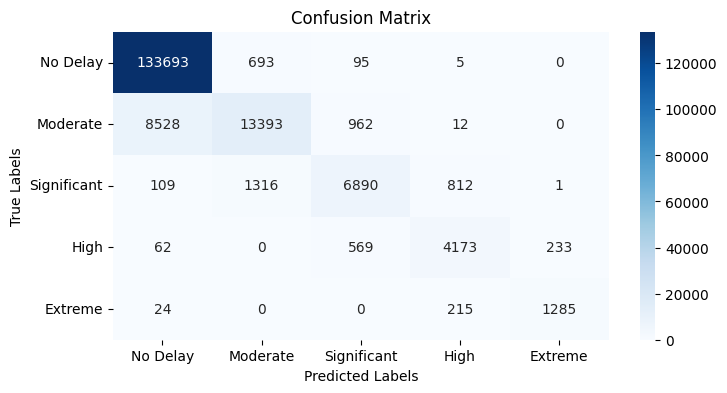

In [119]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['No Delay', 'Moderate', 'Significant', 'High', 'Extreme'],
            yticklabels=['No Delay', 'Moderate', 'Significant', 'High', 'Extreme'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


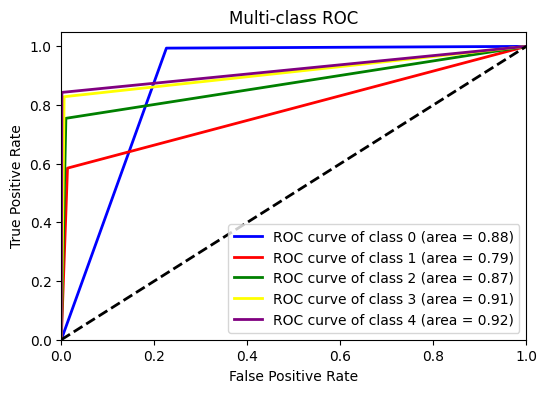

In [120]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(test_true_labels, classes=[0, 1, 2, 3, 4])
y_pred_binarized = label_binarize(test_pred_labels, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(6, 4))

colors = cycle(['blue', 'red', 'green', 'yellow', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

#### 7.2 Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_df_x_2 = np.array(train_df_x)
Validation_df_x_2 = np.array(Validation_df_x)
test_df_x_2 = np.array(test_df_x)
train_df_y_2 = np.array(train_df_y)
Validation_df_y_2 = np.array(Validation_df_y)
test_df_y_2 = np.array(test_df_y)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42)

# Train the model
rf_model.fit(train_df_x_2, train_df_y_2)

# Evaluate the model on the validation set
validation_predictions = rf_model.predict(Validation_df_x_2)
validation_accuracy = accuracy_score(Validation_df_y_2, validation_predictions)
print(f'Validation Accuracy: {validation_accuracy:.4f}')

# Evaluate the model on the test set
test_predictions = rf_model.predict(test_df_x_2)
test_accuracy = accuracy_score(test_df_y_2, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')


Validation Accuracy: 0.9686
Test Accuracy: 0.9236


In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(train_df_x_2, train_df_y_2)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [123]:
# Step 2: Apply Best Parameters
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(train_df_x_2, train_df_y_2)

# Print accuracy on the training set
train_accuracy = rf_model.score(train_df_x_2, train_df_y_2)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Step 3: Print Classification Report
test_predictions = rf_model.predict(test_df_x_2)
print(classification_report(test_df_y_2, test_predictions))

# Print accuracy on the test set
test_accuracy = accuracy_score(test_df_y_2, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")



Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    134486
           1       0.88      0.61      0.72     22895
           2       0.84      0.78      0.81      9128
           3       0.81      0.79      0.80      5037
           4       0.99      0.42      0.59      1524

    accuracy                           0.92    173070
   macro avg       0.89      0.72      0.78    173070
weighted avg       0.92      0.92      0.92    173070

Test Accuracy: 0.9239


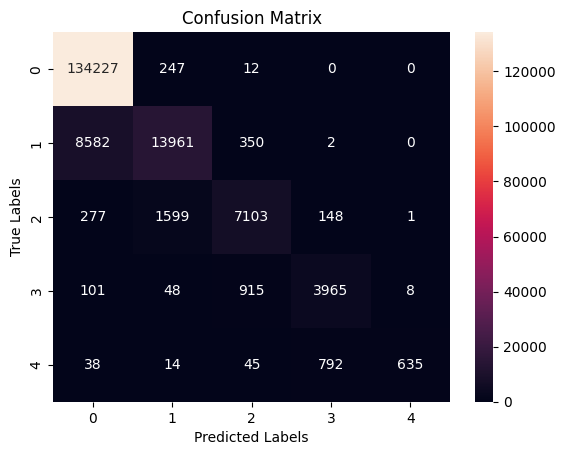

In [124]:
# Step 4: Print Confusion Matrix
conf_matrix = confusion_matrix(test_df_y_2, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



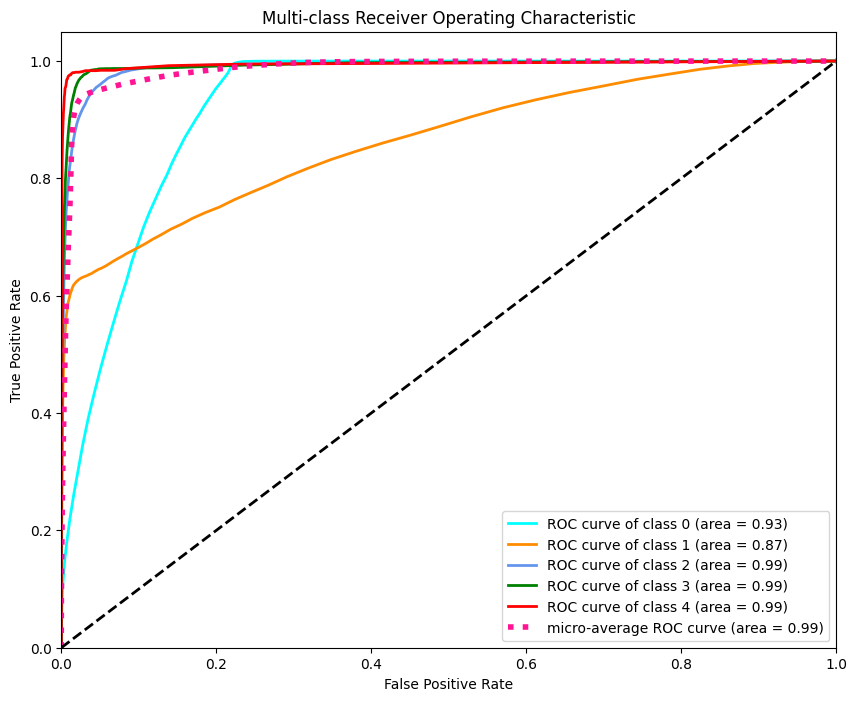

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels in a one-vs-all fashion
test_df_y_bin = label_binarize(test_df_y_2, classes=[0, 1, 2, 3, 4])
n_classes = test_df_y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_df_y_bin[:, i], rf_model.predict_proba(test_df_x_2)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_df_y_bin.ravel(), rf_model.predict_proba(test_df_x_2).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 7.3 LSTM oversampled data set

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import Sequence, to_categorical

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, df_features, df_labels, batch_size=32, n_classes=5, shuffle=True):
        'Initialization'
        self.df_features = df_features
        self.df_labels = df_labels
        self.batch_size = batch_size
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.df_features) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Reshape data to fit LSTM layer expectations
        X = self.df_features.iloc[indexes].to_numpy().reshape(-1, self.df_features.shape[1], 1)
        y = to_categorical(self.df_labels.iloc[indexes], num_classes=self.n_classes)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.df_features))
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Parameters for the model and generators
params = {
    'batch_size': 32,
    'n_classes': 5,
    'shuffle': True
}

# Generators
training_generator = DataGenerator(X_train_smote, y_train_smote, **params)
validation_generator = DataGenerator(Validation_df_x, Validation_df_y, **params)
test_generator = DataGenerator(test_df_x, test_df_y, **params)


NameError: ignored

In [ ]:

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_smote.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=params['n_classes'], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(training_generator,
                    validation_data=validation_generator,
                    epochs=10,  # Number of epochs
                    verbose=2)

In [2]:

# Output training and test accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: ignored

In [ ]:
# Calculate the correct number of steps per epoch for the test set
test_steps_per_epoch = len(test_generator)

# Initialize lists to store predictions and labels
all_predictions = []
all_true_labels = []

# Iterate over the test_generator to get the predictions and true labels
for i in range(test_steps_per_epoch):
    X, y = test_generator[i]
    predictions_batch = model.predict(X)
    all_predictions.append(predictions_batch)
    all_true_labels.append(y)

# Concatenate all the predictions and true labels
predictions = np.vstack(all_predictions)
true_labels = np.vstack(all_true_labels)

# Get the class with the highest probability for each sample
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(true_labels, axis=1)


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(true_classes, predicted_classes, target_names):
    report = classification_report(true_classes, predicted_classes, target_names=target_names)
    print(report)

# Assuming class_labels is a list of your class names
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5']  # Replace with actual class names

generate_classification_report(true_classes, predicted_classes, class_labels)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_classes, predicted_classes, class_labels):
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(true_classes, predicted_classes, class_labels)


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def plot_multiclass_roc(true_labels, predictions, class_labels):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(class_labels)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lime', 'magenta'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

plot_multiclass_roc(true_labels, predictions, class_labels)


### 7.4 Random forrest oversampled data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming X_train_smote and y_train_smote are your full training datasets loaded into memory
# And test_df_x and test_df_y are your test datasets

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
test_predictions = rf_model.predict(test_df_x)

# Evaluate the model
print("Test Accuracy:", np.mean(test_predictions == test_df_y))

# Classification Report
print(classification_report(test_df_y, test_predictions))

# Confusion Matrix
cm = confusion_matrix(test_df_y, test_predictions)
print('Confusion Matrix:')
print(cm)



In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(test_df_y, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

y_score = rf_model.predict_proba(test_df_x)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotting
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

# END